# Lab 5
Lucas Street, 1874989

In [6]:
%%capture
import sys
!{sys.executable} -m pip install --user scipy numpy matplotlib pandas pyuvdata
from multiprocessing import Pool

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
from pyuvdata import UVData

In [7]:
filename = 'zen.2458108.57290.HH.uvh5'
uv = UVData()
uv.read(filename, read_data=False)
unique_times = np.unique(uv.time_array)

selected_times = unique_times[0:5]
frequency_channels = np.arange(0, 128)
uv.read(filename, times=selected_times, freq_chans=frequency_channels)
print('antenna numbers:', sorted(uv.antenna_numbers))
print('antenna pairs:', len(uv.get_antpairs()))

antenna numbers: [0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 27, 36, 37, 38, 39, 40, 41, 50, 51, 52, 53, 54, 55, 65, 66, 67, 68, 69, 70, 71, 82, 83, 84, 85, 86, 87, 88, 98, 120, 121, 122, 123, 124, 136, 137, 138, 139, 140, 141, 142, 143]
antenna pairs: 1378


In [8]:
def get_spectrogram(uv, times, num_freqs, *search_keys):
    data = uv.get_data(*search_keys)
    times = uv.get_times(*search_keys)
    times -= times[0]
    freqs_mhz = uv.freq_array.flatten() / 1e6
    return pd.DataFrame(data, times, freqs_mhz), times, freqs_mhz

def plot_spectrogram(freqs, times, data, colorbar=True):
    # Handle case where we only have times at 0
    if times[0] == times[-1]:
        times = [0, 0.00012428]
    plt.imshow(np.abs(data), origin='bottom', extent=(freqs[0], freqs[-1], times[0], times[-1]), aspect='auto')
    plt.ylabel('Time (s)')
    plt.xlabel('Frequency (MHz)')
    if colorbar:
        cbar = plt.colorbar()
        cbar.set_label('Amplitude')
        
def plot_total_amplitudes(freqs, times, data):
    total_amplitudes = np.sum(np.abs(data), axis=0)
    plt.title('Summed Amplitudes versus frequency')
    plt.plot(freqs, total_amplitudes)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Amplitude')
    plt.xlim(freqs[0], freqs[-1])

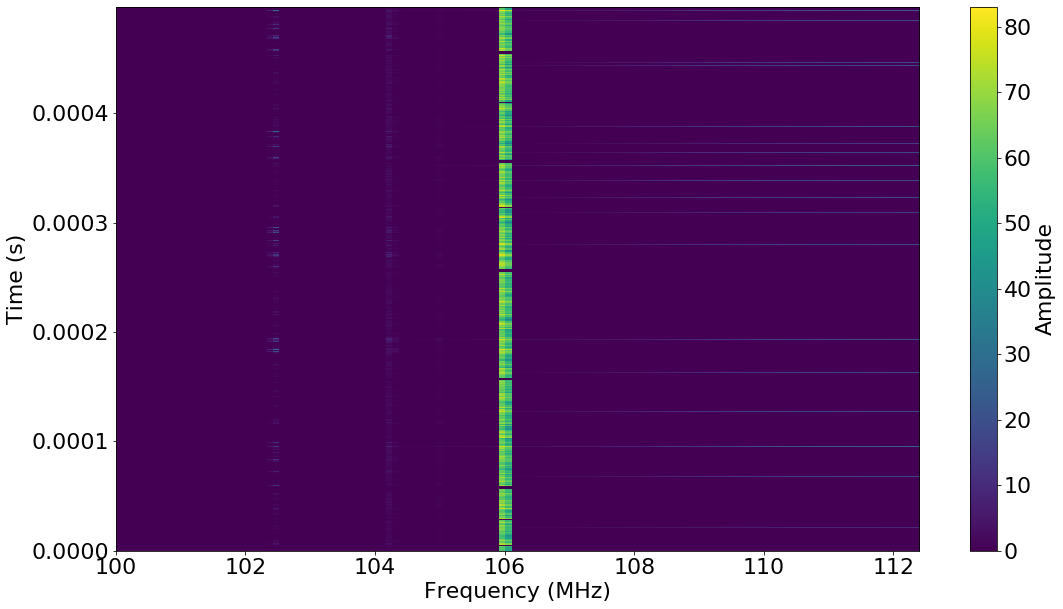

In [9]:
data, times, freqs_mhz = get_spectrogram(uv, selected_times, frequency_channels, 'XX')
plot_spectrogram(freqs_mhz, times, data, colorbar=True)

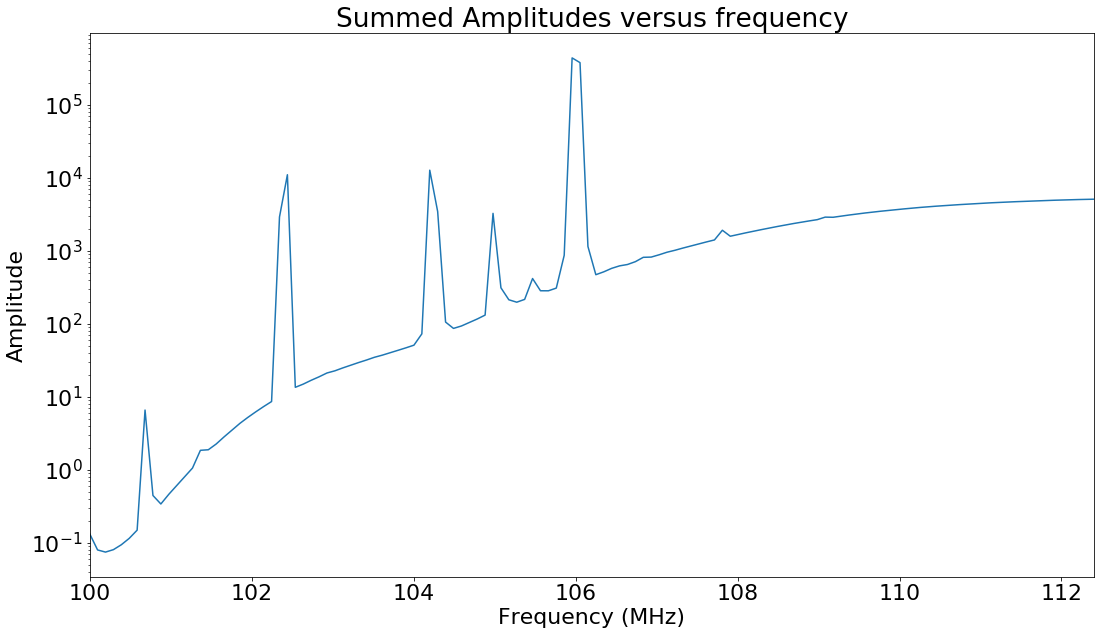

In [10]:
plot_total_amplitudes(freqs_mhz, times, data)
plt.yscale('log')